##  WEBSCRAPING AND TEXTMINING

### Álvaro Kothe
### Mathews Lisboa

# Introdução


- O trabalho tem como enfoque aplicar a técnica de *Web Scraping*, ou em português, raspagem de dados. A técnica consiste em uma coleta de dados de um portal da web, de sites, nos quais são usados scripts para coletar informações que poderão ser usadas para futuras análises. Um exemplo comum de *Web Scraping* na atualidade é em relação ao Twitter, visto que a rede social contém calorosas discussões a respeito dos mais diversos assuntos e pode ser utilizado para determinar a opinião pública a respeito. Porém, o *Web Scraping* é responsável apenas pela coleta dos dados, para realiza uma análise em um conjunto de texto não estruturado é utilizado o *Text Mining*, dessa forma, pode-se transformar os dados coletados da rede social em informações plausíveis de análise. 

- Considerando a introdução as ferramentas, um dos tópicos mais discutidos no *twitter* no Brasil é o *reality show* Big Brother. Sendo assim, foi decidido entre o grupo que uma boa aplicação dessas ferramentas seria realizar uma raspagem de dados no *twitter* em relação ao termo “#bbb21”, coletando assim informações de usuários a em torno desse termo. Dito isso, foi coletado 76932 *tweets* de usuários entre os dias 23 e 26 de abril.

- O objetivo do trabalho é desenvolver as técnicas citadas anteriormente que estão relacionadas ao curso ministrado, assim tornando possível a extração de informações dos usuários do *twitter* utilizando uma API do *twitter* desenvolvedor e realizar as análises descritivas, nuvem de palavras e análise de sentimentos, a fim de tentar caracterizar popularidade dos candidatos em relação aos usuários. 


# Análise

## Lendo os dados

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from src import tratamento_string, candidatos
import pandas as pd
import time 



tweets = pd.read_csv("tweets_bbb21.csv")

tweets['tweet_chave'] = tweets.apply(lambda linha: tratamento_string.normalize(linha['texto']), axis=1)
tweets['ind_candidato'] = tweets.apply(lambda linha: candidatos.dicionario_candidato(linha['texto']), axis=1)
tweets['sentimento'] = tweets.apply(lambda  linha: candidatos.soma_sentimento(linha['tweet_chave']), axis =1)
# tweets = tweets.join(pd.DataFrame(tweets.pop('ind_candidato').tolist()))

## WordCloud

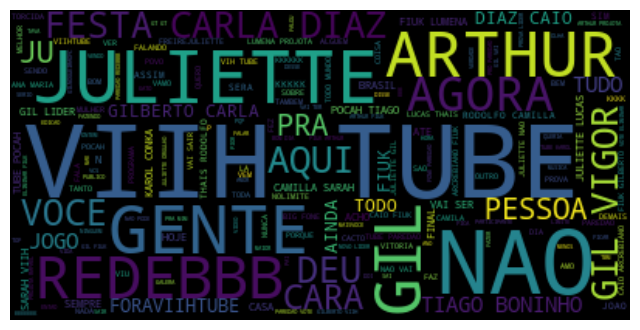

In [3]:
texto = tweets['tweet_chave'].str.join(' ')
tt = ' '.join(texto).upper()
wordcloud = WordCloud().generate(tt)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Análise de Sentimento


In [4]:
tweets['criado_em'] = pd.to_datetime(tweets['criado_em'])

tweets.sentimento.min()

-24.0

In [7]:
agrupados = tweets.groupby(tweets.criado_em.dt.floor('H')) 
sent_hora = agrupados.sentimento.sum()

In [33]:
type(sent_hora.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='criado_em', ylabel='sentimento'>

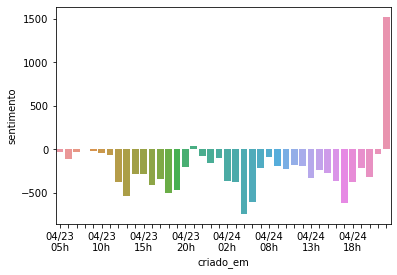

In [48]:
ax = sns.barplot(x = sent_hora.index, y = sent_hora)
ax.set_xticklabels([t.strftime("%m/%d\n%Hh") if not i%5 else "" for i,t in enumerate(sent_hora.index)], rotation=0)
ax

Help on BarContainer in module matplotlib.container object:

class BarContainer(Container)
 |  BarContainer(*args, **kwargs)
 |  
 |  Container for the artists of bar plots (e.g. created by `.Axes.bar`).
 |  
 |  The container can be treated as a tuple of the *patches* themselves.
 |  Additionally, you can access these and further parameters by the
 |  attributes.
 |  
 |  Attributes
 |  ----------
 |  patches : list of :class:`~matplotlib.patches.Rectangle`
 |      The artists of the bars.
 |  
 |  errorbar : None or :class:`~matplotlib.container.ErrorbarContainer`
 |      A container for the error bar artists if error bars are present.
 |      *None* otherwise.
 |  
 |  Method resolution order:
 |      BarContainer
 |      Container
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, patches, errorbar=None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ---------------------------------------

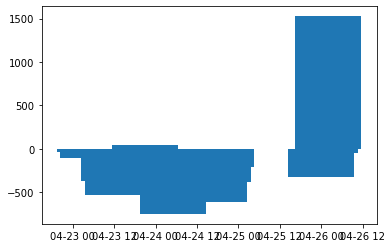

In [28]:
ax = plt.bar(sent_hora.index, sent_hora)
help(ax)
#ax.set_xticklabels([t if not i%5 else "" for i,t in enumerate(sent_hora.index)])
#ax.show()

# Considerações finais

In [ ]:
tweets.columns
datas = tweets.criado_em
print(datas.min())
print(datas.max())